# This Decision Tree Challenge lab is divided in two parts. 
• Part I is to evaluate the performance of the classification tree on Iris dataset.
• Part II, Decision Tree Classifier is used to predict car safety using criterion ‘gini index’.

# Part I: 
Task 1: load the iris dataset, create the data frame and build a Decision tree assuming ‘max_depth’ 
and ‘max_leaf_nodes’ are 3 and 4 respectively. Once your model is fitted, then the make prediction. <br>
Task 2: Create the confusion matrix and explain the findings.<br>
Task 3: Generate the model performance summary and explain your findings.

P.S iris dataset can be downloaded in Kaggle or Just import from Sklearn library.

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
#Loading the Iris dataset
iris = load_iris()

In [24]:
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                  5.1               3.5  ...               0.2       0
1                  4.9               3.0  ...               0.2       0
2                  4.7               3.2  ...               0.2       0
3                  4.6               3.1  ...               0.2       0
4                  5.0               3.6  ...               0.2       0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3       2
146                6.3               2.5  ...               1.9       2
147                6.5               3.0  ...               2.0       2
148                6.2               3.4  ...               2.3       2
149                5.9               3.0  ...               1.8       2

[150 rows x 5 columns]


In [25]:
#features are sepal length, sepal width, petal length, petal width.
#target is the species of iris flower.
#We will predict the species of iris flower based on the features.
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target

In [27]:
#We will split the features and target into two separate variables.
x=df.drop('Species', axis=1)
y=df['Species']
print(x.head())
print(y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [28]:
#We will split the dataset into training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Training set size:", x_train.shape)
print("Testing set size:", x_test.shape)
print("Training set size:", y_train.shape)
print("Testing set size:", y_test.shape)

Training set size: (120, 4)
Testing set size: (30, 4)
Training set size: (120,)
Testing set size: (30,)


In [31]:
#We will initialise and train the decision tree
df = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42)
df.fit(x_train, y_train)
df

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42)

In [32]:
#We will make predictions on the test set.
y_pred = df.predict(x_test)
print("Predictions:", y_pred)

Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [ ]:
#We will create confusion matrix.
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Confusion Matrix Explaination
We can read the diagonal values to check the correct predictions.

For class 0, [10 0 0], 10 means it correctly predicted 10 times.
For class 1, [0 9 0], 9 means it correctly predicted 9 times.
For class 2, [0 0 11], 11 means it correctly predicted 11 times.

Later, we check the off-diagonal values to see if there are misclassifications. Luckily, we do not have misclassifications since all values are 0.

We can say that the model predicted everything correctly or it could be overfitting.

In [34]:
#We will create classification report.
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Model Performace
The model accuracy is 100% as it predicted all test samples correctly.

In [39]:
#We will check the accuracy of the model.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


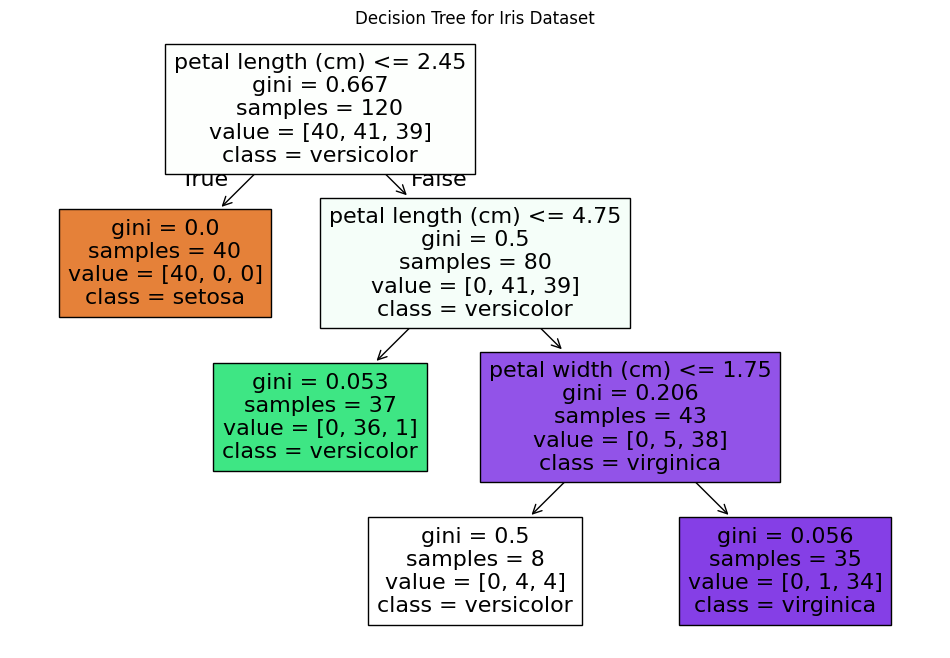

In [36]:
#We will create the decision tree plot.
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(df, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree for Iris Dataset")
plt.show()

# Overfitting checking with cv
When I check for overfitting with cv, it shows the the scores are high and it means the model performs well across the data subsets. Mean cv accuracy is about 93.3%. It means model is generally reliable.Therefore, the model is consistent and reliable. There is no overfitting problem.

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(dt, x_train, y_train, cv=5, scoring='accuracy')

# Fit the model on the training data
dt.fit(x_train, y_train)

# Make predictions
y_pred = dt.predict(x_test)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)

# Display results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# Analyze if there's overfitting
if test_accuracy < np.mean(cv_scores):
    print("The model might be overfitting as the test set accuracy is lower than the cross-validation accuracy.")
else:
    print("The model's performance is consistent, and overfitting is less likely.")


Cross-validation scores: [0.95238095 0.9047619  0.9047619  1.         0.9047619 ]
Mean CV Accuracy: 0.9333
Test Set Accuracy: 1.0000
The model's performance is consistent, and overfitting is less likely.


# Part II:
Part II:
Decision Tree Classifier is used to predict stock price using criterion ‘gini index’. The Decision  Tree Classification is implemented with Python and Scikit-Learn. 

# dataset link 
# Please forget previous dataset (Tokyo stock price, it needs time series analysis/prediciton algorithm. sorry for overlooking.), Use this one
https://www.kaggle.com/c/santander-customer-transaction-prediction/data?select=train.csv


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

In [5]:
train_file_path = 'C:/Users/Administrator/Desktop/Personal_NAING/Parami_Naing/Advance Machine Learning/Decision Tree/train.csv'
test_file_path = 'C:/Users/Administrator/Desktop/Personal_NAING/Parami_Naing/Advance Machine Learning/Decision Tree/test.csv'
df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

In [6]:
print(df_train.head())
print(df_test.head())

   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0

In [7]:
X = df_train.drop(columns=['ID_code', 'target'])
y = df_train['target']
print(X.head())
print(y.head())

     var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_1

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", x_train.shape)
print("Testing set size:", x_test.shape)

Training set size: (160000, 200)
Testing set size: (40000, 200)


In [9]:
classifier = DecisionTreeClassifier(criterion ='gini', max_depth=3, random_state=42)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Predictions:", y_pred)

Predictions: [0 0 0 ... 0 0 0]


In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.897625


In [11]:
#classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.53      0.00      0.01      4097

    accuracy                           0.90     40000
   macro avg       0.71      0.50      0.48     40000
weighted avg       0.86      0.90      0.85     40000



In [12]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[35885    18]
 [ 4077    20]]


True Negatives (TN) is 35885. It means 35885 cases are correctly predicted as class 0.
False Positive (FP) is 18. It means 18 cases are incorrectly predicted as class 1.
False Negatives (FN): 4077. It means 4077 cases are incorrectly predicted as class 0.
True Positive (TP) is 20. It means 20 cases are correctly predicted as class 1.
Based on those values, we can say the model predicts well with class 0 but class 1 was not able to predicts well.

According to the confusion matrix, we can say class 0 is the most one in the dataset. So, there is imbalance. We can use techniques like SMOTE to generate synthetic samples for the minority class.